This notebook will help to visualize some of the data in Kiva Loans dataset.

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import collections

Here is some of the data.

In [8]:
df = pd.read_csv('data_files/kiva_loans.csv')
df[:100]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01


In [3]:
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [4]:
sectors = np.array(df['sector'])
countries = np.array(df['country'])
genders = np.array(df['borrower_genders'])

genders_updated = []

for gender in genders:
    if(type(gender)==str):
        gender = gender.replace(',', '').replace("'", '').replace("[", '').replace("]", '')
        gender = gender.split(' ')
        for x in gender:
            genders_updated.append(x)

genders = np.array_str(genders)

sectors_count = collections.Counter(sectors)
countries_count = collections.Counter(countries)
borrower_genders = collections.Counter(genders_updated)

common_sector_labels = np.array(sectors_count.most_common(10))[:, 0]
common_sector_counts = np.array(sectors_count.most_common(10))[:, 1] 

common_countries_labels = np.array(countries_count.most_common(10))[:, 0]
common_countries_counts = np.array(countries_count.most_common(10))[:, 1] 


First, let's take a look at some of the borrower demographics. 

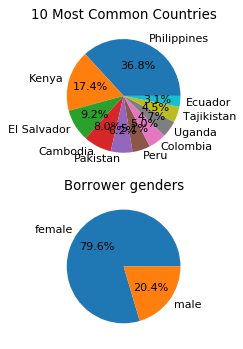

In [22]:
from matplotlib.gridspec import GridSpec
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
the_grid = GridSpec(3, 1)

plt.subplot(the_grid[1, 0], aspect=1)
plt.pie(common_countries_counts, labels=common_countries_labels, autopct='%1.1f%%',)
plt.title('10 Most Common Countries')

plt.subplot(the_grid[2, 0], aspect=1)
plt.pie(borrower_genders.values(), labels=borrower_genders.keys(), autopct='%1.1f%%',)
plt.title('Borrower genders')


plt.show()

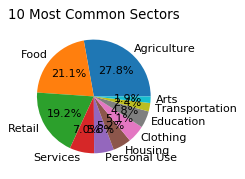

In [12]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
the_grid = GridSpec(3, 1)

plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(common_sector_counts, labels=common_sector_labels, autopct='%1.1f%%',)
plt.title('10 Most Common Sectors')

plt.show()

Ideas:
* Trends within different countries (sector, amount funded)
* Show number of sectors, number of countries
* Check if most are in rural or urban areas 

Questions:
* What is the difference between funded amount and loan amount?
* Is there data on the lenders?